DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
Check for null and unique values for test and train sets.
Apply label encoder.
Perform dimensionality reduction.
Predict your test_df values using XGBoost.

import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.metrics import *
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


loading the datasets

In [2]:
traindf=pd.read_csv('train.csv',header=0)
testdf=pd.read_csv('test.csv',header=0)

In [3]:
traindf.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
testdf.head()


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
traindf.describe

<bound method NDFrame.describe of         ID       y  X0 X1  X2 X3 X4  X5 X6 X8  ...  X375  X376  X377  X378  \
0        0  130.81   k  v  at  a  d   u  j  o  ...     0     0     1     0   
1        6   88.53   k  t  av  e  d   y  l  o  ...     1     0     0     0   
2        7   76.26  az  w   n  c  d   x  j  x  ...     0     0     0     0   
3        9   80.62  az  t   n  f  d   x  l  e  ...     0     0     0     0   
4       13   78.02  az  v   n  f  d   h  d  n  ...     0     0     0     0   
...    ...     ...  .. ..  .. .. ..  .. .. ..  ...   ...   ...   ...   ...   
4204  8405  107.39  ak  s  as  c  d  aa  d  q  ...     1     0     0     0   
4205  8406  108.77   j  o   t  d  d  aa  h  h  ...     0     1     0     0   
4206  8412  109.22  ak  v   r  a  d  aa  g  e  ...     0     0     1     0   
4207  8415   87.48  al  r   e  f  d  aa  l  u  ...     0     0     0     0   
4208  8417  110.85   z  r  ae  c  d  aa  g  w  ...     1     0     0     0   

      X379  X380  X382  X383 

In [6]:
testdf.info

<bound method DataFrame.info of         ID  X0  X1  X2 X3 X4  X5 X6 X8  X10  ...  X375  X376  X377  X378  \
0        1  az   v   n  f  d   t  a  w    0  ...     0     0     0     1   
1        2   t   b  ai  a  d   b  g  y    0  ...     0     0     1     0   
2        3  az   v  as  f  d   a  j  j    0  ...     0     0     0     1   
3        4  az   l   n  f  d   z  l  n    0  ...     0     0     0     1   
4        5   w   s  as  c  d   y  i  m    0  ...     1     0     0     0   
...    ...  ..  ..  .. .. ..  .. .. ..  ...  ...   ...   ...   ...   ...   
4204  8410  aj   h  as  f  d  aa  j  e    0  ...     0     0     0     0   
4205  8411   t  aa  ai  d  d  aa  j  y    0  ...     0     1     0     0   
4206  8413   y   v  as  f  d  aa  d  w    0  ...     0     0     0     0   
4207  8414  ak   v  as  a  d  aa  c  q    0  ...     0     0     1     0   
4208  8416   t  aa  ai  c  d  aa  g  r    0  ...     1     0     0     0   

      X379  X380  X382  X383  X384  X385  
0        0  

In [7]:
print(testdf.shape)
print(traindf.shape)

(4209, 377)
(4209, 378)


# EDA : Visualization target variable

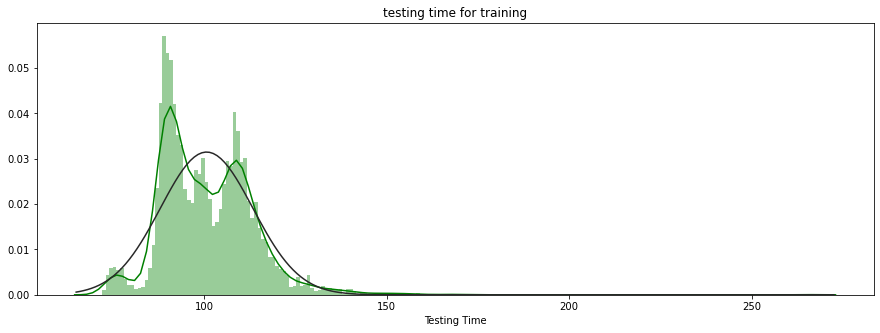

In [8]:
#Visualization of the distribution of the target variable.
from scipy.stats import norm
plt.figure(figsize=(15, 5))
sns.distplot(traindf['y'],bins=200,color='green',kde=True,fit=norm).set(title='testing time for training',xlabel='Testing Time')
plt.show()

This data is positively skewed, with a long tail stretching into the upper values.The testing time has 02 peaks.The majority of test durations are between 90 and 120 seconds.

### Checking whether things are changing over time

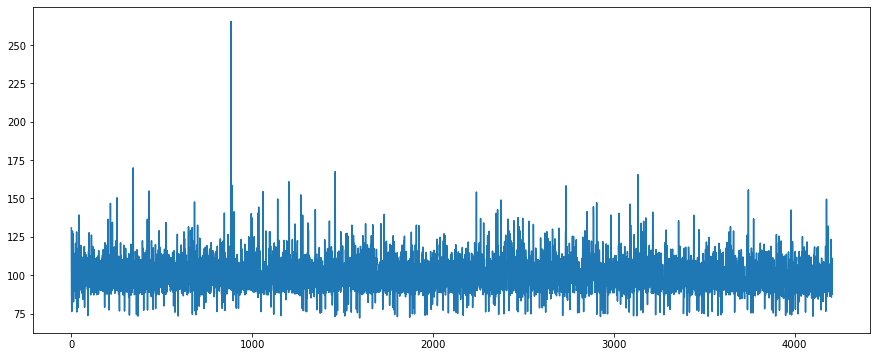

In [9]:
plt.figure(figsize=(15,6))
plt.plot(traindf['y']);

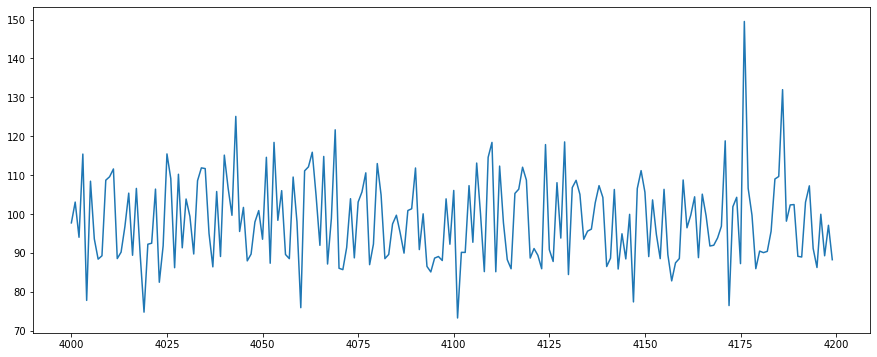

In [10]:
plt.figure(figsize=(15,6))
plt.plot(traindf['y'][4000:4200]);

This series is not displaying seasonality, cyclicity or trend so this is not a time series.

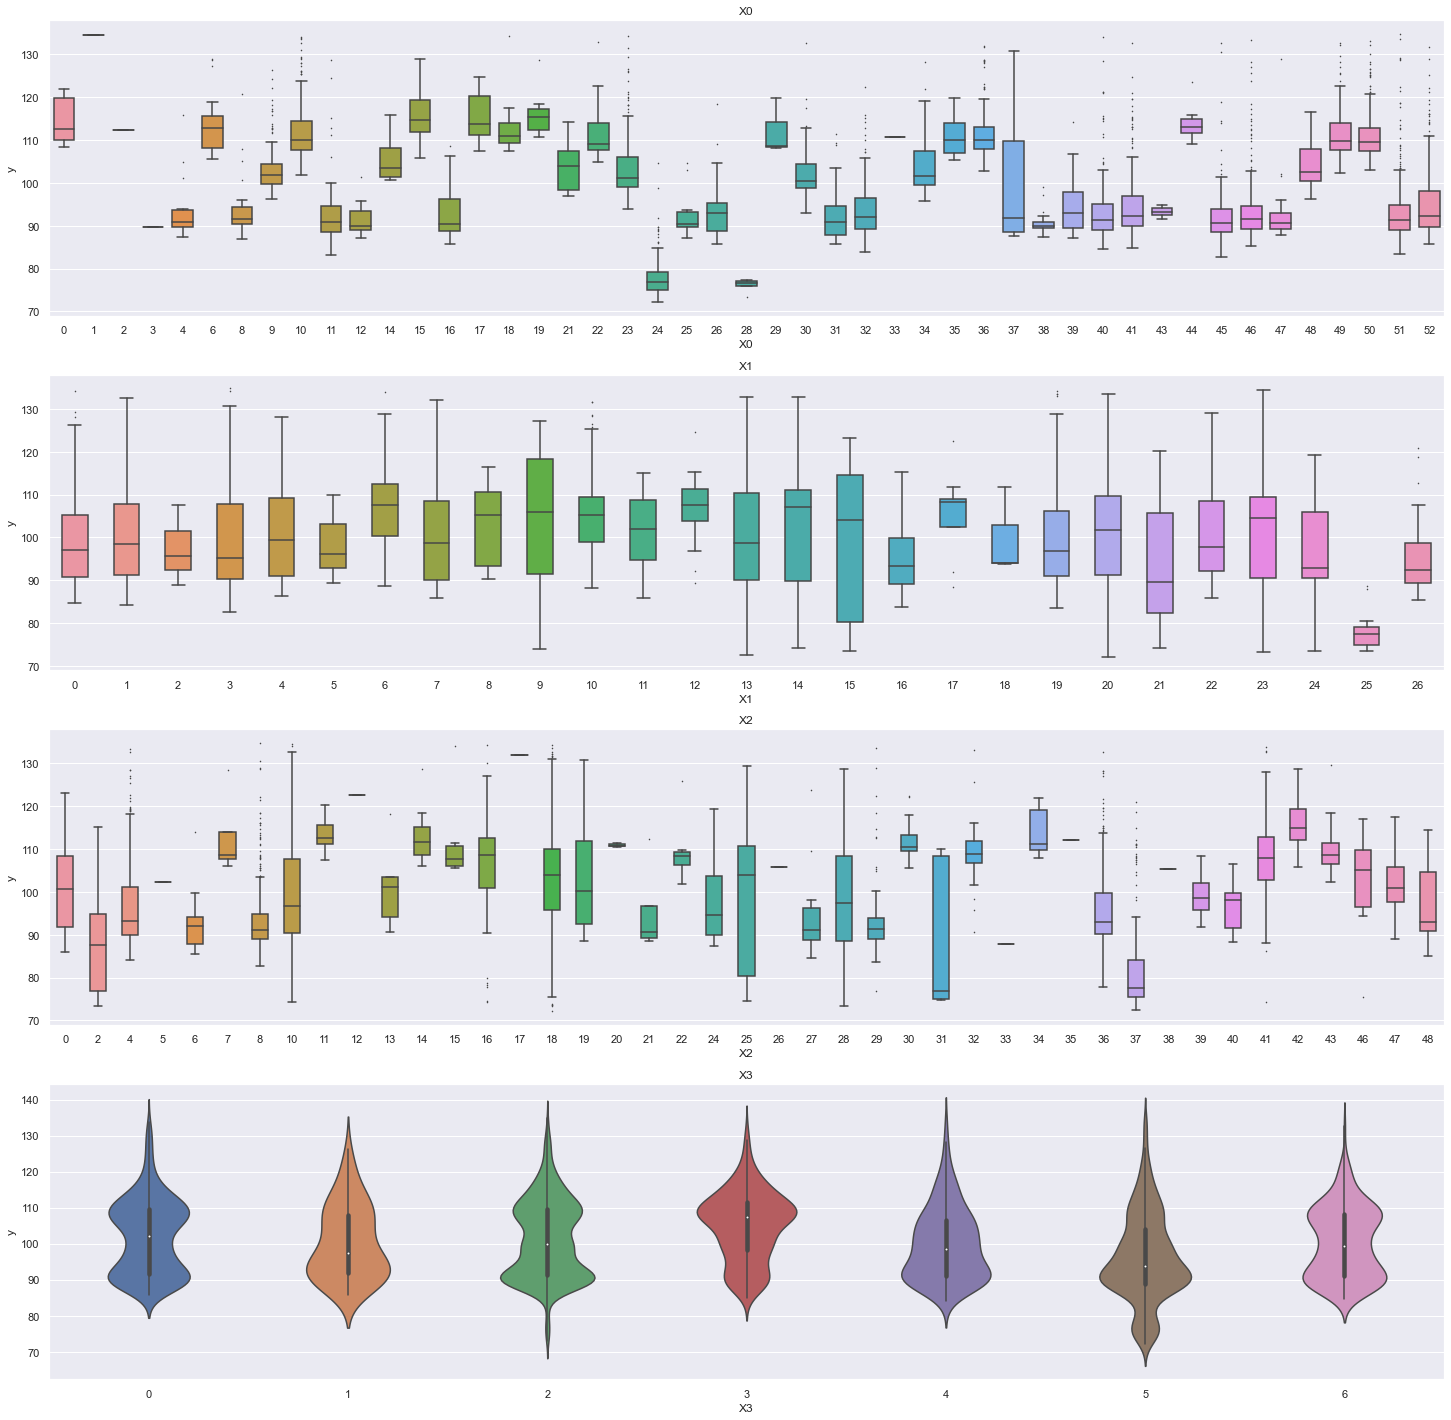

In [47]:
sns.set(rc={'figure.figsize':(25,25)})
fig,ax=plt.subplots(4,1)
sns.boxplot(x='X0',y='y',data=traindf,width=0.7,fliersize=0.7,ax=ax[0])
ax[0].set_title('X0')
sns.boxplot(x='X1',y='y',data=traindf,width=0.5,fliersize=0.7,ax=ax[1])
ax[1].set_title('X1')
sns.boxplot(x='X2',y='y',data=traindf,width=0.5,fliersize=0.7,ax=ax[2])
ax[2].set_title('X2')
sns.violinplot(x='X3',y='y',data=traindf,width=0.5,fliersize=0.7,ax=ax[3])
ax[3].set_title('X3')
plt.show()

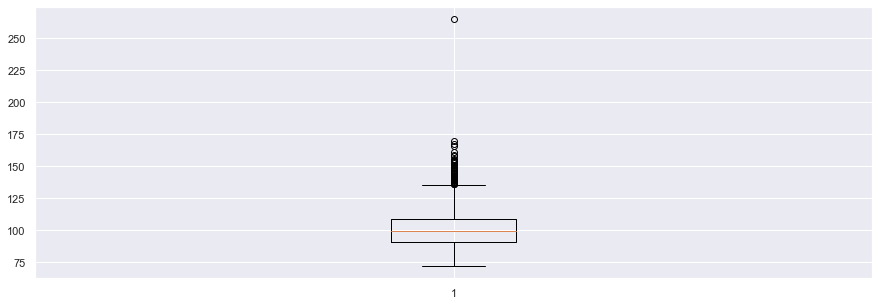

In [12]:
#Checking for outliers
plt.figure(figsize=(15, 5))
plt.boxplot(traindf['y'])
plt.show()

In [13]:
traindf['y'].max()

265.32

In [14]:
traindf['y'].min()

72.11

In [15]:
outl=traindf[traindf['y']>135].index
outl

Int64Index([  43,  203,  216,  253,  342,  420,  429,  681,  846,  883,  889,
             900,  995,  998, 1033, 1036, 1060, 1141, 1203, 1205, 1269, 1279,
            1349, 1427, 1459, 1730, 2240, 2263, 2348, 2357, 2376, 2414, 2447,
            2470, 2496, 2530, 2735, 2736, 2852, 2887, 2888, 2905, 2983, 3028,
            3090, 3133, 3165, 3177, 3215, 3358, 3442, 3744, 3773, 3980, 4176],
           dtype='int64')

In [16]:
traindf=traindf.drop(outl)

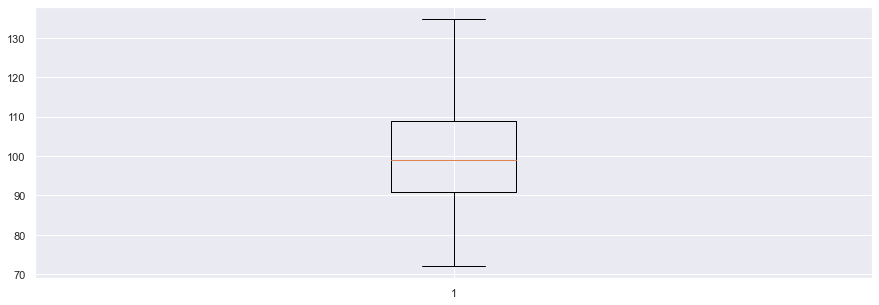

In [17]:
plt.figure(figsize=(15, 5))
plt.boxplot(traindf['y'])
plt.show()

In [18]:
traindf.shape

(4154, 378)

The outlier determined by the test duration was removed.

# Checking variance and removing columns with 0 variance

In [19]:
threshold = 0.0

traindf=traindf.drop(traindf.var()[traindf.var() <= threshold].index.values, axis=1)

In [20]:
traindf.shape

(4154, 365)

In [21]:
traindf.head(21)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
6,24,128.76,al,r,e,f,d,f,h,s,...,0,0,0,0,0,0,0,0,0,0
7,25,91.91,o,l,as,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,s,as,e,d,f,i,h,...,1,0,0,0,0,0,0,0,0,0
9,30,126.99,j,b,aq,c,d,f,a,e,...,0,0,1,0,0,0,0,0,0,0


# Checking for null values

In [22]:
traindf.isnull().sum().sum()

0

In [23]:
#There is no null value

# Encoding categorical variables

In [24]:
testdf.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [25]:
traindf.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [26]:
for c in traindf.columns:
    if traindf[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(traindf[c].values) + list(testdf[c].values))
        traindf[c] = lbl.transform(list(traindf[c].values))
        testdf[c] = lbl.transform(list(testdf[c].values))

In [27]:
traindf.dtypes.value_counts()

int64      364
float64      1
dtype: int64

In [28]:
testdf.dtypes.value_counts()

int64    377
dtype: int64

In [29]:
testdf.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,24,23,37,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,46,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,24,23,18,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,24,13,37,5,3,32,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,49,20,18,2,3,31,8,12,0,...,1,0,0,0,0,0,0,0,0,0


# Correlation between the target variable and the categorical variables

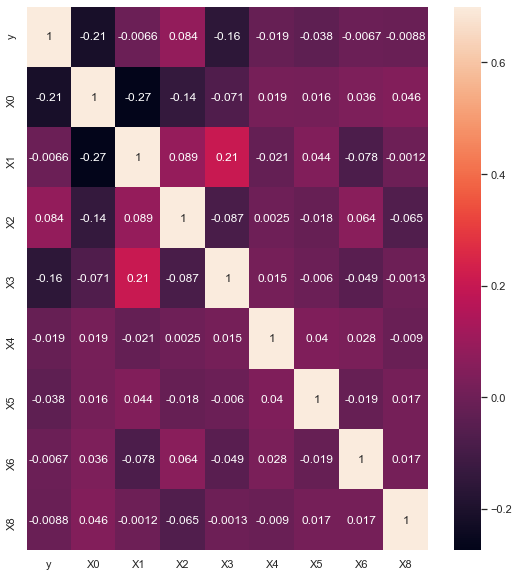

In [30]:
cata=traindf.iloc[:,1:10]
cata.head()
corr=cata.corr()
fig,ax= plt.subplots()
fig.set_size_inches(9,10)
sns.heatmap(corr,annot=True,vmax=.7)

In [31]:
corr

,y,X0,X1,X2,X3,X4,X5,X6,X8
y,1.000000,-0.212817,-0.006612,0.084155,-0.157755,-0.018708,-0.037621,-0.006654,-0.008759
X0,-0.212817,1.000000,-0.274668,-0.138907,-0.071246,0.018569,0.015524,0.036446,0.045852
X1,-0.006612,-0.274668,1.000000,0.088701,0.206104,-0.020832,0.044250,-0.077965,-0.001161
X2,0.084155,-0.138907,0.088701,1.000000,-0.087280,0.002485,-0.017508,0.063615,-0.065458
X3,-0.157755,-0.071246,0.206104,-0.087280,1.000000,0.015491,-0.006027,-0.048587,-0.001278
X4,-0.018708,0.018569,-0.020832,0.002485,0.015491,1.000000,0.040055,0.027936,-0.009049
X5,-0.037621,0.015524,0.044250,-0.017508,-0.006027,0.040055,1.000000,-0.018763,0.017333
X6,-0.006654,0.036446,-0.077965,0.063615,-0.048587,0.027936,-0.018763,1.000000,0.017148
X8,-0.008759,0.045852,-0.001161,-0.065458,-0.001278,-0.009049,0.017333,0.017148,1.000000


In [32]:
traindf.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,37,23,19,0,3,27,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,37,21,21,4,3,31,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,24,24,37,2,3,30,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,24,21,37,5,3,30,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,24,23,37,5,3,14,3,13,...,0,0,0,0,0,0,0,0,0,0


# Splitting the data

In [33]:
X_train = traindf.drop(['ID','y'],axis=1)
y_train = traindf['y'].values

X_test = testdf.values
id_test =traindf['ID'].values

# PCA for dimensionality reduction

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_trainpca=pca.fit_transform(X_train)
X_testpca=pca.fit_transform(X_test)
print(pca.explained_variance_ratio_.sum())
print("--------------------------------------------------------------")
print(pca.components_)
print("--------------------------------------------------------------")
print(pca.components_.shape)
print("--------------------------------------------------------------")

0.9999982603928779
--------------------------------------------------------------
[[-9.99997090e-01  6.78549630e-05 -3.47973030e-04 ...  1.46154177e-08
  -1.53639151e-07 -4.43274021e-07]
 [-9.32913515e-05 -9.44869904e-01  2.15967264e-01 ...  2.44708611e-05
  -2.44878280e-05 -3.21040660e-05]
 [ 6.75236203e-05  2.48701736e-01  3.39973276e-02 ... -1.91678471e-05
   6.66235181e-06  3.99631900e-06]
 ...
 [ 1.22681781e-05  8.89709601e-03 -1.96024920e-02 ...  5.40131972e-06
   3.47319674e-04 -8.97665022e-04]
 [-3.07652821e-05  1.77835416e-04 -3.04136050e-02 ... -8.30831795e-04
  -1.25917733e-03 -8.40724973e-04]
 [ 4.34694459e-06  1.23108721e-02 -2.71595215e-02 ... -4.71652750e-04
   4.08368862e-04  1.91314269e-04]]
--------------------------------------------------------------
(15, 377)
--------------------------------------------------------------


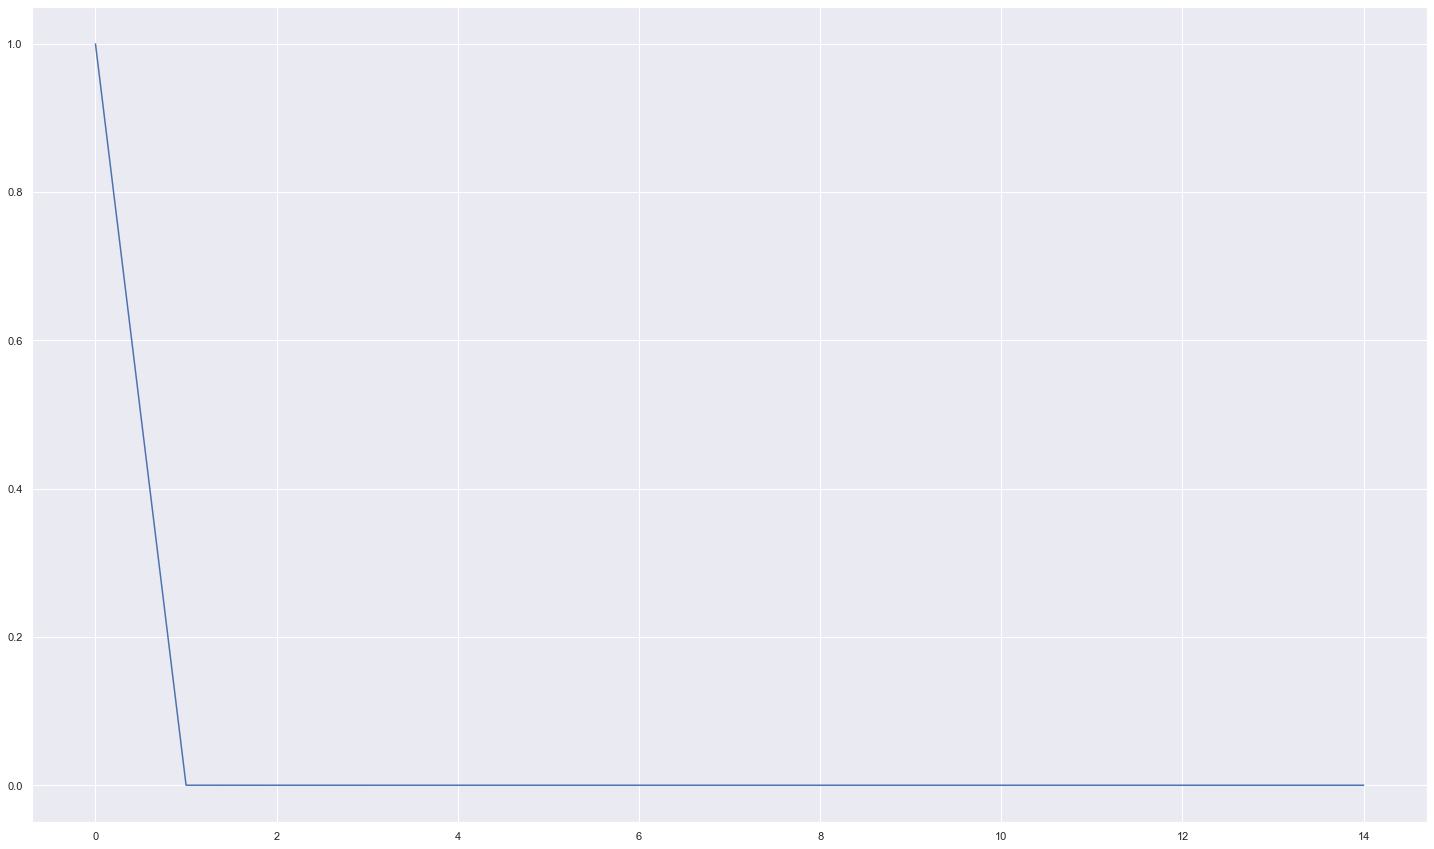

In [35]:
plt.plot(pca.explained_variance_ratio_)

In [36]:
pd.DataFrame(X_trainpca).shape

(4154, 15)

In [37]:
pd.DataFrame(X_testpca).shape

(4209, 15)

# Regression using XGBOOST

In [38]:
X_train=pd.DataFrame(X_trainpca)
y_train=pd.DataFrame(traindf['y'])
testdf=pd.DataFrame(X_testpca)
id_test = traindf['ID']

from sklearn.model_selection import train_test_split

X_train, X_conf, y_train, y_conf = train_test_split(X_train,y_train,test_size=0.2,random_state=42)


dtrain = xgb.DMatrix(X_train, label=y_train)
xgb_model = xgb.XGBRegressor(base_score=0.6, colsample_bylevel=1,
                   colsample_bynode=1, colsample_bytree=0.5, 
                   learning_rate=0.2, gamma=0.01, importance_type='gain',
                   max_depth=4, n_estimators=100,reg_alpha=0., reg_lambda=1, subsample=0.5, 
                   objective='reg:squarederror', random_state=28)

xgb_model.fit(X_train, y_train)
train_pred = xgb_model.predict(X_conf)




# Accuray Score on train dataset

print('R2 : ', r2_score(y_conf,train_pred))

#RMSE of the train dataset
mse=mean_squared_error(y_conf, train_pred)
print('RMSE :',np.sqrt(mse))

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, n_splits=10)

print('Accuracy of Model with Cross Validation is:',cross_val_score(xgb_model, X_train, y_train, cv=kf,scoring='r2').mean()*100)


R2 :  0.47913531561452416
RMSE : 8.076892695925027
Accuracy of Model with Cross Validation is: 51.40239872177881


# From the value of the R2(0.48) ,we can say that the model performance is good but the optimization will helped to make it better.

In [39]:
feature_importance=pd.DataFrame(xgb_model.feature_importances_)
feature_importance

,0
0,0.104440
1,0.047174
2,0.036939
3,0.048986
4,0.038513
5,0.042091
6,0.058907
7,0.092870
8,0.042959
9,0.101129


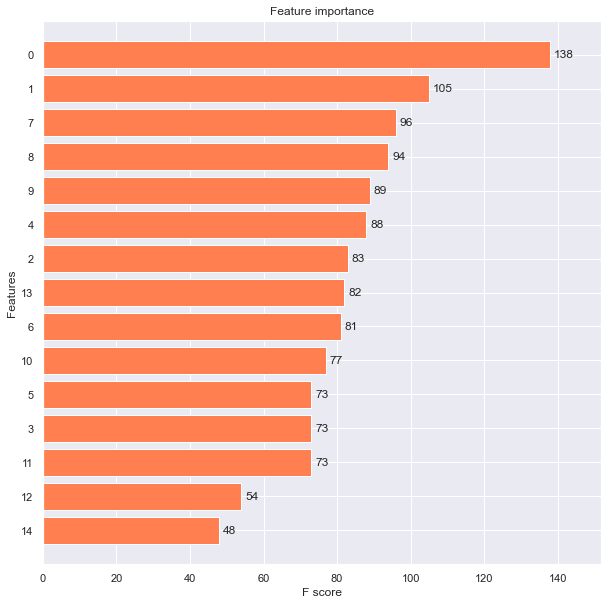

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgb_model, max_num_features=40, height=0.8, ax=ax, color = 'coral')
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# GRIDSEARCH

In [41]:
from sklearn.model_selection import GridSearchCV

params_xgb = {'gamma': [0.001,0.03,0.04,0.05,0.1,0.02], 'max_depth': [3,4,6,8], 'reg_alpha': [0,], 'reg_lambda': [1,], 
           'n_estimators': [10,30,100], 'learning_rate': [0.02,0.01,0.08,0.05,0.1], 'subsample': [0.5,]}

#params_xgb = {'gamma': [0.025,0.003,0.035,0.01], 'max_depth': [3,4,8]}

grid_xgb = GridSearchCV(xgb_model,params_xgb, cv=3, scoring='r2',verbose=1, n_jobs=-1)
grid_xgb.fit(X_train, y_train)
grid_xgb.predict(X_conf)
print('XGBoosting best RMSE: %f using %s\n' % (-grid_xgb.best_score_, grid_xgb.best_params_))
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_xgb.best_score_)))
print("Accuracy Score for train : " + str(grid_xgb.score(X_train,y_train)* 100.0))
print("Accuracy Score for confirmation : " + str(grid_xgb.score(X_conf,y_conf)* 100.0))

pd.DataFrame(grid_xgb.cv_results_).head()

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  4.4min finished


XGBoosting best RMSE: -0.530936 using {'gamma': 0.1, 'learning_rate': 0.08, 'max_depth': 6, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.5}

Lowest RMSE found:  0.7286534025126887
Accuracy Score for train : 76.97717700408808
Accuracy Score for confirmation : 49.59529355755659


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_reg_alpha,param_reg_lambda,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.137960,0.010851,0.018955,0.008991,0.001,0.02,3,10,0,1,0.5,"{'gamma': 0.001, 'learning_rate': 0.02, 'max_d...",-51.058798,-49.552119,-51.669539,-50.760152,0.889853,313
1,0.454616,0.112502,0.013981,0.000004,0.001,0.02,3,30,0,1,0.5,"{'gamma': 0.001, 'learning_rate': 0.02, 'max_d...",-22.604351,-21.836508,-23.096056,-22.512305,0.518311,241
2,1.600484,0.055794,0.016646,0.001248,0.001,0.02,3,100,0,1,0.5,"{'gamma': 0.001, 'learning_rate': 0.02, 'max_d...",-0.894614,-0.847027,-1.120758,-0.954133,0.119412,139
3,0.098507,0.002490,0.009989,0.000003,0.001,0.02,4,10,0,1,0.5,"{'gamma': 0.001, 'learning_rate': 0.02, 'max_d...",-51.058798,-49.552119,-51.669539,-50.760152,0.889853,313
4,0.454953,0.190209,0.011981,0.000005,0.001,0.02,4,30,0,1,0.5,"{'gamma': 0.001, 'learning_rate': 0.02, 'max_d...",-22.606482,-21.836508,-23.095017,-22.512669,0.518049,247


In [42]:
#Optimizing the model using the best parameters from GridSearch
xgb_model1=xgb.XGBRegressor(base_score=0.5, colsample_bylevel=1,
                               colsample_bynode=1, colsample_bytree=0.5,
                            gamma= 0.7, learning_rate=0.08, max_depth= 5,objective='reg:squarederror',
                             n_estimators= 100, reg_alpha= 0, importance_type='gain',reg_lambda=1, subsample= 0.5,random_state=128,seed=110)              


xgb_model1.fit(X_train,y_train)
xgb_pred=xgb_model1.predict(X_conf)
mse1=mean_squared_error(y_conf, xgb_pred)
results = xgb_model1.base_score
print('RMSE :',np.sqrt(mse1))
print('R2 : ', r2_score(y_conf,xgb_pred))

RMSE : 8.008330535688613
R2 :  0.4879406909188412


In [43]:
results

0.5

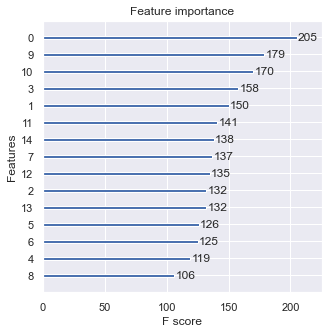

In [44]:
xgb.plot_importance(xgb_model1)
plt.show()

In [45]:
#Prediction with the test dataset that was provided

p_test = xgb_model1.predict(testdf)

pred = pd.DataFrame()
pred['y'] = p_test
pred['old']=y_train
pred.head(10)

,y,old
0,109.590546,130.81
1,103.260628,88.53
2,104.719475,76.26
3,108.329414,80.62
4,104.893936,78.02
5,101.720192,92.93
6,106.616211,NaN
7,97.998421,91.91
8,104.680313,NaN
9,105.981201,126.99
